In [1]:
import cv2
import numpy as np
import matplotlib . pyplot as plt #matplotlib

In [2]:
#image = cv2.imread("harris_elephant.jpeg")
#image = cv2.imread("harris_car.jpeg")
image = cv2.imread("harris_sunflower.jpg")
print(image.shape)

(1555, 1404, 3)


In [3]:
print(image.shape)

(1555, 1404, 3)


In [4]:
# 1
# Task 1
def Harris_Matrix(image):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray = np.float32(gray)

    # x and y derivatives using Sobel operator
    Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3, borderType = cv2.BORDER_REFLECT)
    Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3, borderType = cv2.BORDER_REFLECT)
    #print(Ix)
    #print(np.max(Ix))
    Ix -= np.mean(Ix)
    Iy -= np.mean(Iy)
    #print(Ix)
    #print(np.max(Ix))
    #plt.imshow(Iy)
    # Gaussian mask
    gauss = cv2.getGaussianKernel(ksize=5, sigma=0.5)

    # Harris matrix 2x2 contents
    Ixx = cv2.filter2D(Ix**2, -1, gauss, borderType = cv2.BORDER_REFLECT)
    Iyy = cv2.filter2D(Iy**2, -1, gauss, borderType = cv2.BORDER_REFLECT)
    Ixy = cv2.filter2D(Ix*Iy, -1, gauss, borderType = cv2.BORDER_REFLECT)
    
    #print(Ixx.shape)
    x,y=gray.shape
    H_Matrix = np.zeros((x,y,2,2))
    for i in range(x):
        for j in range(y):
            #H_Matrix[i][j]=np.array(Ixx[i][j],Ixy[i][j],Ixy[i][j],Iy[i][j])
            H_Matrix[i, j] = np.array([[Ixx[i, j], Ixy[i, j]], [Ixy[i, j], Iyy[i, j]]])
            
    print(H_Matrix.shape)
         
    return H_Matrix


In [5]:
# 1
# Task 2

In [6]:
def Corner_Strength(k=0.1):
    
        # Extract the shape from the H_Matrix
    Harris = Harris_Matrix(image)
    x, y, _, _ = Harris.shape

    # corner strength array
    corner_strength = np.zeros((x, y))
    corner_coordinates = []
    # corner strength for each pixel
    for i in range(x):
        for j in range(y):
            H = Harris[i, j]
            #print(H.shape)
            # The determinant of H
            det_H = np.linalg.det(H)
            # The trace of H
            trace_H = np.trace(H)
            # Compute the corner strength
            corner_strength[i][j] = det_H - k * (trace_H ** 2)
            
            
            if corner_strength[i][ j] > 1562:
                # Add the coordinates of the corner to the list
                corner_coordinates.append((j, i))

    return corner_strength, corner_coordinates

    #return corner_strength

In [7]:
import matplotlib . pyplot as plt #matplotlib
c,corner_coordinates =Corner_Strength(k=0.1)

(1555, 1404, 2, 2)


In [8]:
print(np.min(c))
print(np.max(c))
print(c.shape)

-68454342941.20232
10956600728.215843
(1555, 1404)


In [9]:
print(np.sum(c>0))

431420


In [10]:
print(np.sum(c<0))
print(np.mean(c>0))

1751800
0.1976072040380722


In [11]:
print(len(corner_coordinates))

97289


In [12]:
print(np.mean(c>0) * np.max(c))

2165103235.6642385


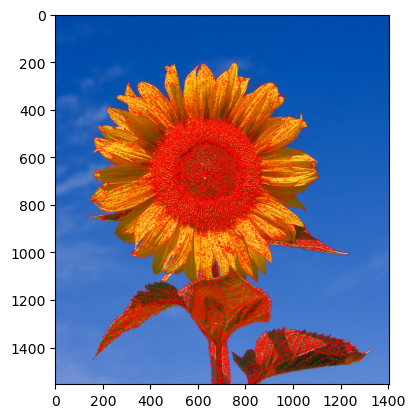

In [13]:


# Draw circles around detected corners
def draw_corners(image, corner_coordinates):
    #plt.imshow(image)
    for corner in corner_coordinates:
        cv2.circle(image, corner, radius=1, color=(0, 0,255), thickness=1)
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sun_det_corner = draw_corners(image, corner_coordinates)
plt.imshow(sun_det_corner)

In [14]:
# 1
# Task 3

In [15]:
#print(Corner_Strength().shape)
#image = cv2.imread("harris_elephant.jpeg")
#image = cv2.imread("harris_car.jpeg")
image = cv2.imread("harris_sunflower.jpg")

In [16]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
print(Ix.shape)
def Orientation():
    # Compute the orientation (angle) at each pixel
    x,y=gray.shape
    orientation = np.zeros((x, y))
    for i in range(x):
        for j in range(y):
            
            orientation[i, j] = np.arctan2(Iy[1,j], Ix[i,j])

    return orientation


(1555, 1404)


In [17]:
print(Orientation())

[[ 0.          0.         -0.46364761 ... -2.03444394 -1.57079633
  -1.57079633]
 [ 0.          0.         -0.78539816 ... -2.03444394 -1.57079633
  -1.57079633]
 [ 0.          0.         -1.57079633 ... -1.57079633 -1.32581766
  -1.57079633]
 ...
 [ 0.          3.14159265 -2.89661399 ... -2.03444394 -1.32581766
  -1.57079633]
 [ 0.          3.14159265 -2.89661399 ... -1.57079633 -1.57079633
  -1.57079633]
 [ 0.          3.14159265 -2.89661399 ... -1.57079633 -1.57079633
  -1.57079633]]


In [18]:
print(Orientation().shape)

(1555, 1404)


In [19]:
# 1
# Task 4

In [20]:
mx = np.max(c)
mxx = np.sum(c>0)
def cunt10(n):
    
    while(n>0):
        
        cd=np.sum(n<mx)
        if(cd > 0.01 * mxx ):
            break
        n=int(n/10)
    return n

In [21]:
def cuntDigits(n):
    c=0
    i=1
    while(n>0):
        n=int(n/10)
        c=c+1
        
    #while(True):
        #t=int(mx/(10 ** (cuntDigits(mx)-i)))
        #if(np.sum(t<mx) > 0.01 * mxx):
            #break
        #i=i+1
    return c
    #return i

In [22]:
print(cuntDigits(999999))

6


In [23]:
print(int(1050/100))

10


In [24]:
    mx = np.max(c)
    print(mx)
    print(cuntDigits(mx))
    thresh = int(mx/(10 ** (cuntDigits(mx)-4)))
    print(thresh)

10956600728.215843
11
1095


In [25]:

def Thresholding(c):
    mx = np.max(c)
    thresh = int(mx/(10 ** (cuntDigits(mx)-4)))
    #thresh = int(mx/(10 ** (i)))
    #thresh = cunt10(mx)
    # * np.mean(c>0)

    Harris = Harris_Matrix(image)
    x, y, _, _ = Harris.shape
    k=0.1
    #corner_strength = np.zeros((x, y))
    corner_strength = c
    x, y = corner_strength.shape
    corner_coordinates = []
    # Compute the corner strength for each pixel

    i = 0
    while i < x-6:
        j = 0  
        while j < y-6:
            # Extract the 7x7 block
            c_block = corner_strength[i:i+7, j:j+7]

            # max value 
            max_c = np.max(c_block)
            if max_c > thresh:
                #562:
                # Find the position of the max value within the block
                f, g = np.unravel_index(np.argmax(c_block, axis=None), c_block.shape)
                
                corner_coordinates.append((j + g, i + f)) 
                
            j += 7
        i += 7
                
    return corner_strength, corner_coordinates    
    


In [26]:
i=14
for i in range(0,i-6,7):
    print(i)

0
7


In [27]:
c_t,corner_coordinate =Thresholding(c)

(1555, 1404, 2, 2)


In [28]:
print(len(corner_coordinate))

16481


In [29]:
# 1
# Task 5

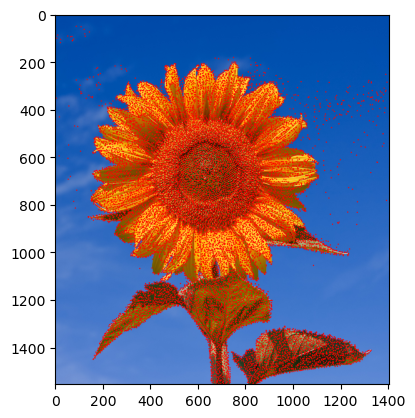

In [30]:
# Draw circles around detected corners
def draw_corners(image, corner_coordinates):
    #plt.imshow(image)
    for corner in corner_coordinates:
        cv2.circle(image, corner, radius=1, color=(0, 0,255), thickness=2)
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sun_det = draw_corners(image, corner_coordinate)
plt.imshow(sun_det)

In [31]:
print(np.max(c))

10956600728.215843


In [32]:
i=np.array([[0,1,2],[6,7,8]])
print(i[0,2])

2


In [33]:
#image = cv2.imread("harris_elephant.jpeg")
#image = cv2.imread("harris_car.jpeg")
image = cv2.imread("harris_sunflower.jpg")

In [34]:
# 1
# Task 6
def Corner_Strength2(k=0.1):
        # Extract the shape from the H_Matrix
    Harris = Harris_Matrix(image)
    x, y, _, _ = Harris.shape

    corner_strength = np.zeros((x, y))
    corner_coordinates = []
    # Compute the corner strength for each pixel
    for i in range(x):
        for j in range(y):
            H = Harris[i, j]

                        # eigenvalues using numpy's eigen decomposition
            eigenvalues, _ = np.linalg.eig(H)

            # Sort 
            eigenvalues.sort()

            corner_strength[i, j] = eigenvalues[1]-eigenvalues[0]
            
            if corner_strength[i][ j] > 1562:
                #and corner_strength[i][ j] <1:
                # Add the coordinates of the corner to the list
                corner_coordinates.append((j, i))

    return corner_strength, corner_coordinates

    #return corner_strength

(1555, 1404, 2, 2)


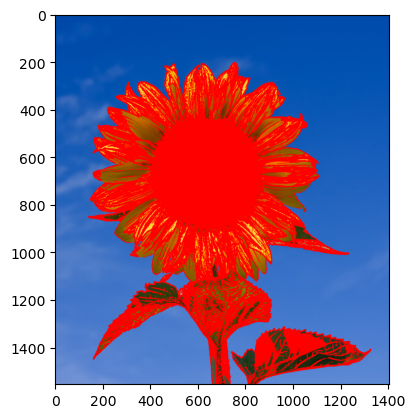

In [35]:
c1,corner_coordinates1 =Corner_Strength2(k=0.1)

# Draw circles around detected corners
def draw_corners(image, corner_coordinates):
    #plt.imshow(image)
    for corner in corner_coordinates:
        cv2.circle(image, corner, radius=1, color=(0, 0,255), thickness=1)
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sun_eigen_corner = draw_corners(image, corner_coordinates1)
plt.imshow(sun_eigen_corner)

In [36]:
print(len(corner_coordinates1))

486972


In [37]:
# 1
# Task 6, sub Task: Task 3

In [38]:
#image = cv2.imread("harris_elephant.jpeg")
#image = cv2.imread("harris_car.jpeg")
image = cv2.imread("harris_sunflower.jpg")

In [39]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)

In [40]:
print(Orientation())

[[ 0.          0.         -0.46364761 ... -2.03444394 -1.57079633
  -1.57079633]
 [ 0.          0.         -0.78539816 ... -2.03444394 -1.57079633
  -1.57079633]
 [ 0.          0.         -1.57079633 ... -1.57079633 -1.32581766
  -1.57079633]
 ...
 [ 0.          3.14159265 -2.89661399 ... -2.03444394 -1.32581766
  -1.57079633]
 [ 0.          3.14159265 -2.89661399 ... -1.57079633 -1.57079633
  -1.57079633]
 [ 0.          3.14159265 -2.89661399 ... -1.57079633 -1.57079633
  -1.57079633]]


In [41]:
# 1
# Task 6, sub Task: Task 4
c_t1,corner_coordinate1 =Thresholding(c1)

(1555, 1404, 2, 2)


In [42]:
print(len(corner_coordinate1))

12751


In [43]:
# 1
# Task 6, sub Task: Task 5

# Draw circles around detected corners

def draw_corners(image, corner_coordinates):
    #plt.imshow(image)
    for corner in corner_coordinates:
        cv2.circle(image, corner, radius=1, color=(0, 0,255), thickness=2)
    #return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sun_eigen = draw_corners(image, corner_coordinate1)

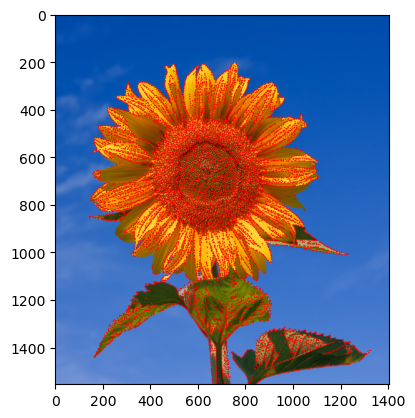

In [44]:
plt.imshow(sun_eigen)

In [45]:
# 1
# Task 5

image = cv2.imread("harris_elephant.jpeg")
#image = cv2.imread("harris_car.jpeg")
#image = cv2.imread("harris_sunflower.jpg")

In [46]:

c,corner_coordinates =Corner_Strength(k=0.1)

(1000, 1500, 2, 2)


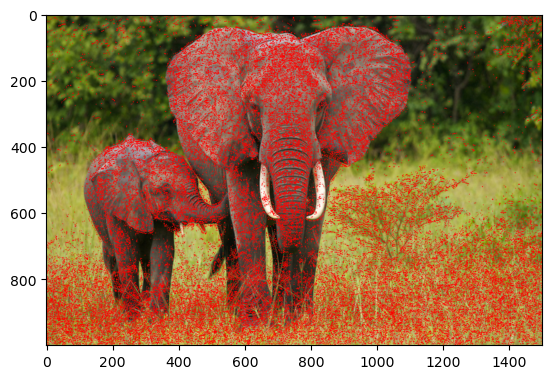

In [47]:

# Draw circles around detected corners
def draw_corners(image, corner_coordinates,r=1,t=1):
    #plt.imshow(image)
    for corner in corner_coordinates:
        cv2.circle(image, corner, radius=1, color=(0, 0,255), thickness=t)
    #plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
ele_det_corner = draw_corners(image, corner_coordinates)
plt.imshow(ele_det_corner)

In [48]:
# 1
# Task 5, sub Task: Task 3
image = cv2.imread("harris_elephant.jpeg")

In [49]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
print(Orientation())

[[1.57079633 1.17227388 1.37340077 ... 2.42276265 1.735945   1.57079633]
 [1.57079633 1.1284221  1.37340077 ... 2.19104581 1.57079633 1.57079633]
 [1.57079633 1.04600056 1.32581766 ... 1.84909599 1.32581766 1.57079633]
 ...
 [1.57079633 2.75742329 2.59672874 ... 0.16514868 0.29849893 1.57079633]
 [1.57079633 2.68825396 2.59672874 ... 0.43662716 0.5880026  1.57079633]
 [1.57079633 2.60578142 2.55359005 ... 1.29249667 0.98279372 1.57079633]]


(1000, 1500, 2, 2)


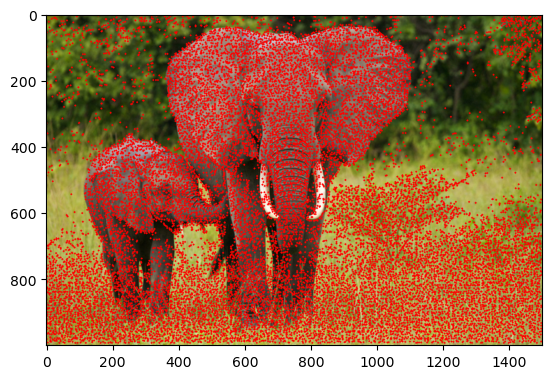

In [50]:
# 1
# Task 5, sub Task: Task 4

c_t,corner_coordinate =Thresholding(c)

# 1
# Task 5

# Draw circles around detected corners

ele_det = draw_corners(image, corner_coordinate,t=3)
plt.imshow(ele_det)

In [51]:
# 1
# Task 6, sub Task: Task 2
image = cv2.imread("harris_elephant.jpeg")

(1000, 1500, 2, 2)


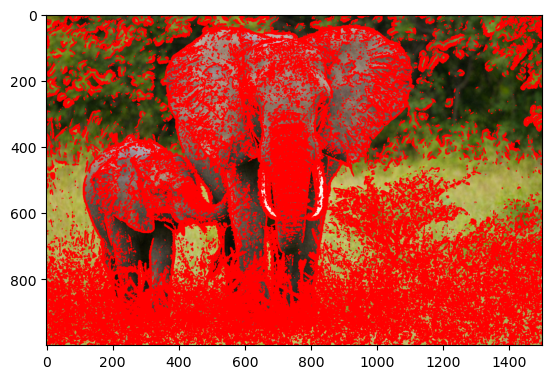

In [52]:

c1,corner_coordinates1 =Corner_Strength2(k=0.1)


ele_eigen_corner = draw_corners(image, corner_coordinates1)
plt.imshow(ele_eigen_corner)

In [53]:
# 1
# Task 6, sub Task: Task 3
image = cv2.imread("harris_elephant.jpeg")

In [54]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
print(Orientation())

[[1.57079633 1.17227388 1.37340077 ... 2.42276265 1.735945   1.57079633]
 [1.57079633 1.1284221  1.37340077 ... 2.19104581 1.57079633 1.57079633]
 [1.57079633 1.04600056 1.32581766 ... 1.84909599 1.32581766 1.57079633]
 ...
 [1.57079633 2.75742329 2.59672874 ... 0.16514868 0.29849893 1.57079633]
 [1.57079633 2.68825396 2.59672874 ... 0.43662716 0.5880026  1.57079633]
 [1.57079633 2.60578142 2.55359005 ... 1.29249667 0.98279372 1.57079633]]


(1000, 1500, 2, 2)


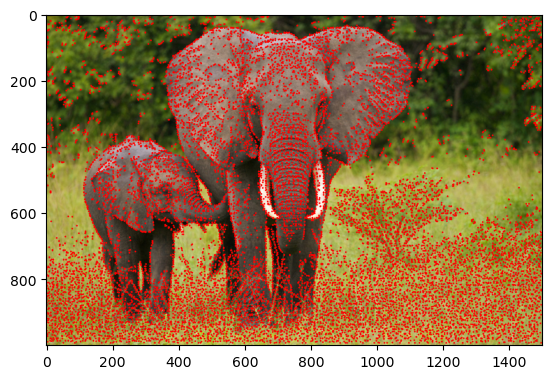

In [55]:
# 1
# Task 6, sub Task: Task 4
c_t1,corner_coordinate1 =Thresholding(c1)

# 1
# Task 6, sub Task: Task 5

ele_eigen = draw_corners(image, corner_coordinate1,t=2)
plt.imshow(ele_eigen)

In [56]:
# 1
# Task 5

#image = cv2.imread("harris_elephant.jpeg")
image = cv2.imread("harris_car.jpeg")
#image = cv2.imread("harris_sunflower.jpg")

In [57]:
c,corner_coordinates =Corner_Strength(k=0.1)

(175, 288, 2, 2)


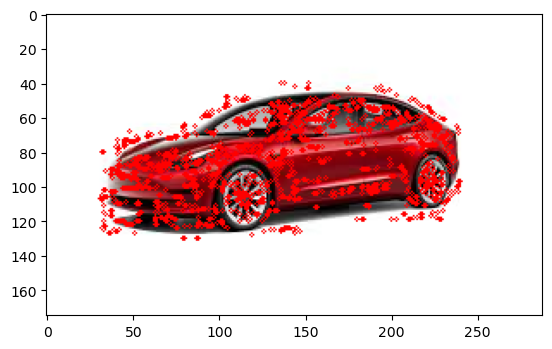

In [58]:
car_det_corner = draw_corners(image, corner_coordinates)
plt.imshow(car_det_corner)

In [59]:
image = cv2.imread("harris_car.jpeg")

In [60]:

gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
print(Orientation())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(175, 288, 2, 2)


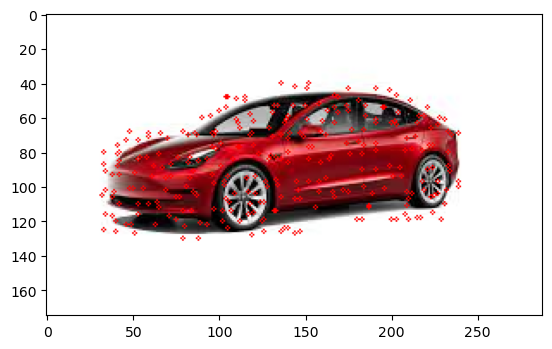

In [61]:
c_t,corner_coordinate =Thresholding(c)
# Draw circles around detected corners

car_det = draw_corners(image, corner_coordinate)
plt.imshow(car_det)

In [62]:
# 1
# Task 6, sub Task: Task 3
image = cv2.imread("harris_car.jpeg")

(175, 288, 2, 2)


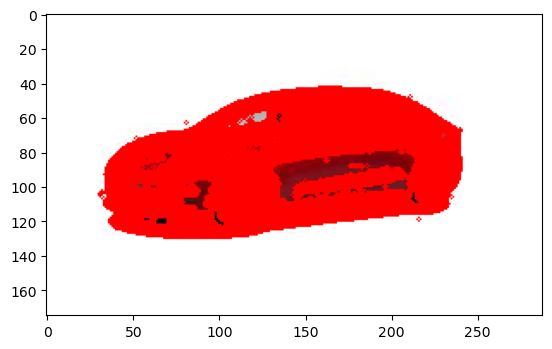

In [63]:
c1,corner_coordinates1 =Corner_Strength2(k=0.1)


car_eigen_corner = draw_corners(image, corner_coordinates1)
plt.imshow(car_eigen_corner)

In [64]:
# 1
# Task 6, sub Task: Task 4

image = cv2.imread("harris_car.jpeg")

In [65]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray = np.float32(gray)
Ix = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
Iy = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
print(Orientation())

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(175, 288, 2, 2)


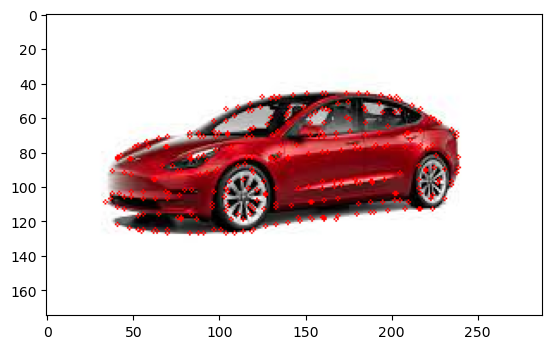

In [66]:
# 1
# Task 6, sub Task: Task 5

c_t1,corner_coordinate1 =Thresholding(c1)

car_eigen = draw_corners(image, corner_coordinate1)
plt.imshow(car_eigen)

In [67]:
# 1
# Task 6

imag = [ele_det,ele_eigen,car_det,car_eigen,sun_det,sun_eigen]

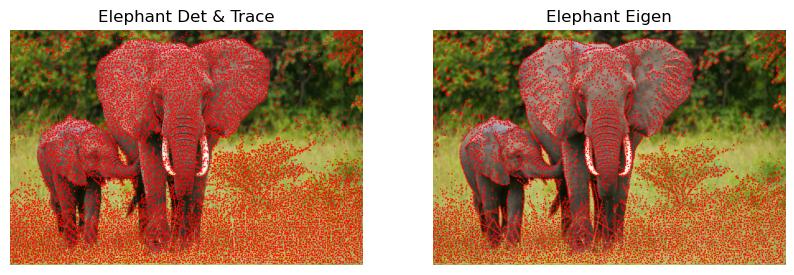

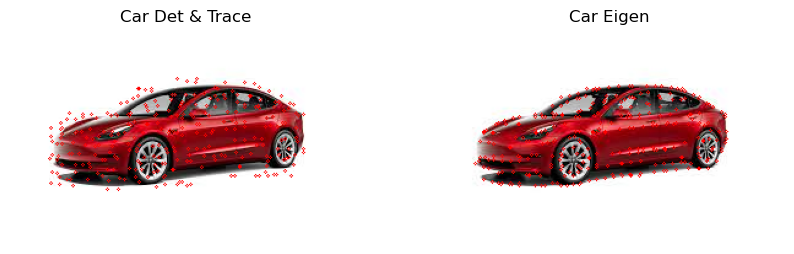

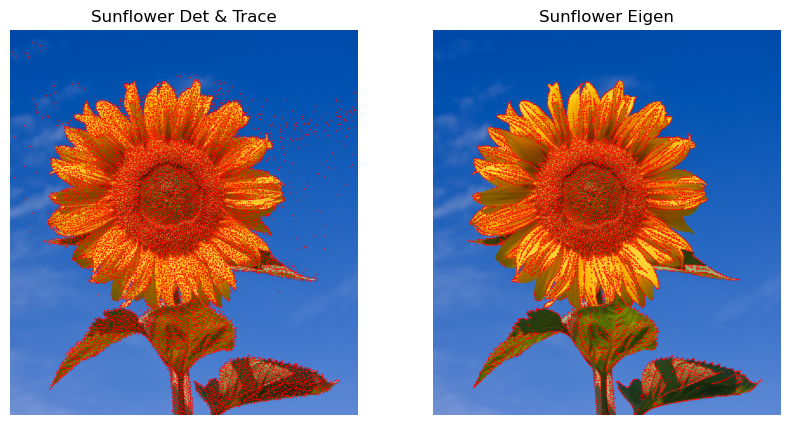

In [68]:
import matplotlib.pyplot as plt

imag_set1 = imag[:2]  
imag_set2 = imag[2:4] 
imag_set3 = imag[4:] 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imag_set1[0])
axes[0].set_title('Elephant Det & Trace')
axes[0].axis('off')
axes[1].imshow(imag_set1[1])
axes[1].set_title('Elephant Eigen')
axes[1].axis('off')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imag_set2[0])
axes[0].set_title('Car Det & Trace')
axes[0].axis('off')
axes[1].imshow(imag_set2[1])
axes[1].set_title('Car Eigen')
axes[1].axis('off')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imag_set3[0])
axes[0].set_title('Sunflower Det & Trace')
axes[0].axis('off')
axes[1].imshow(imag_set3[1])
axes[1].set_title('Sunflower Eigen')
axes[1].axis('off')
plt.show()


In [69]:
# 1
# Task 6 differences of c(H) with threshold=512
imag = [ele_det_corner,ele_eigen_corner,car_det_corner,car_eigen_corner,sun_det_corner,sun_eigen_corner]


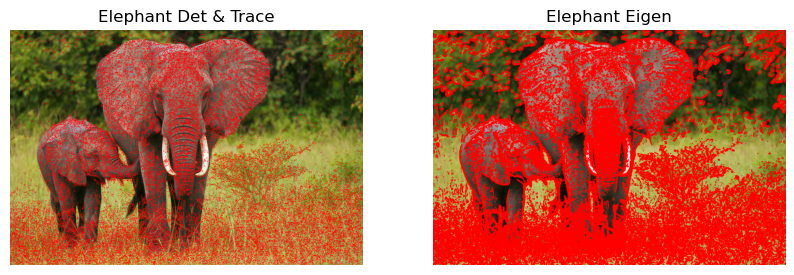

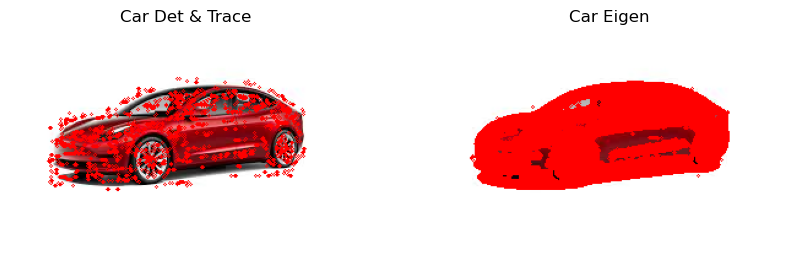

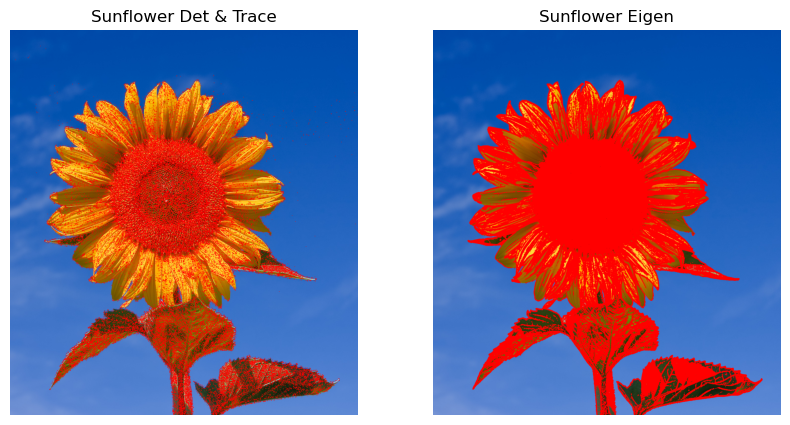

In [70]:
import matplotlib.pyplot as plt

imag_set1 = imag[:2]  
imag_set2 = imag[2:4] 
imag_set3 = imag[4:] 

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imag_set1[0])
axes[0].set_title('Elephant Det & Trace')
axes[0].axis('off')
axes[1].imshow(imag_set1[1])
axes[1].set_title('Elephant Eigen')
axes[1].axis('off')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imag_set2[0])
axes[0].set_title('Car Det & Trace')
axes[0].axis('off')
axes[1].imshow(imag_set2[1])
axes[1].set_title('Car Eigen')
axes[1].axis('off')
plt.show()

fig, axes = plt.subplots(1, 2, figsize=(10, 5))
axes[0].imshow(imag_set3[0])
axes[0].set_title('Sunflower Det & Trace')
axes[0].axis('off')
axes[1].imshow(imag_set3[1])
axes[1].set_title('Sunflower Eigen')
axes[1].axis('off')
plt.show()


(237, 358, 2, 2)
(237, 358, 3)


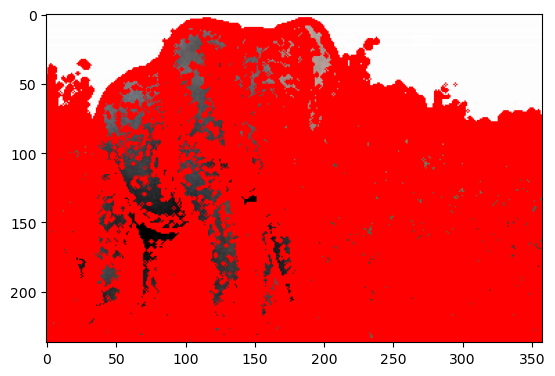

In [71]:
image = cv2.imread("elephant_key.jpg")
c1,corner_coordinates1 =Corner_Strength2(k=0.1)
print(image.shape)

ele_eigen_corner = draw_corners(image, corner_coordinates1)
plt.imshow(ele_eigen_corner)
image = cv2.imread("elephant_key.jpg")

In [72]:
# 1
# Task 7

(237, 358, 2, 2)


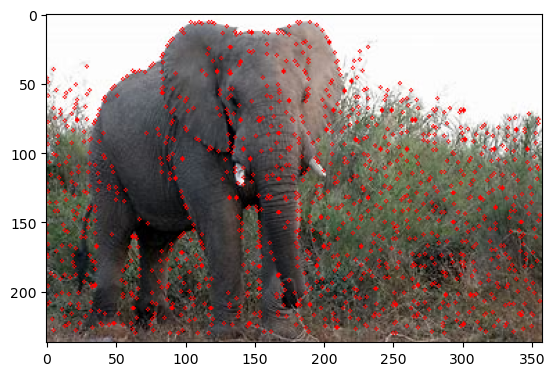

In [73]:
c_t1,corner_coordinate1 =Thresholding(c1)

ele_eigen = draw_corners(image, corner_coordinate1,t=1)
plt.imshow(ele_eigen)

(288, 474, 2, 2)


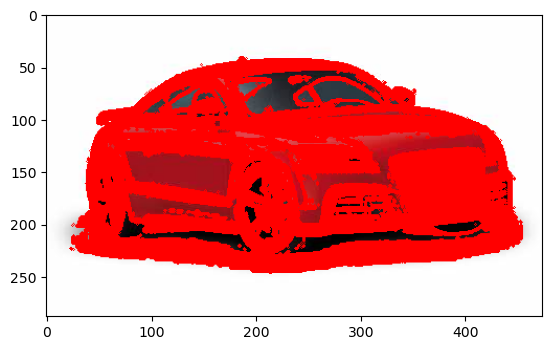

In [74]:
image = cv2.imread("car_key.jpg")
c1,corner_coordinates1 =Corner_Strength2(k=0.1)


ele_eigen_corner = draw_corners(image, corner_coordinates1)
plt.imshow(ele_eigen_corner)
image = cv2.imread("car_key.jpg")

(288, 474, 2, 2)


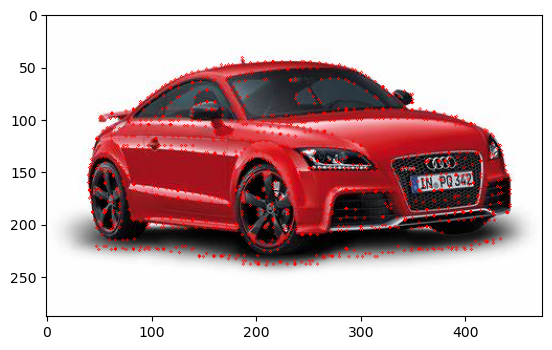

In [75]:
c_t1,corner_coordinate1 =Thresholding(c1)

ele_eigen = draw_corners(image, corner_coordinate1,t=1)
plt.imshow(ele_eigen)

(1000, 1600, 2, 2)


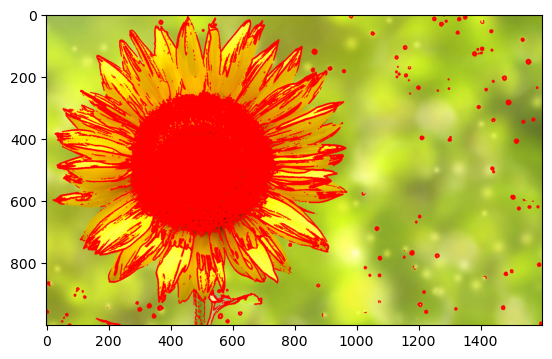

In [76]:
image = cv2.imread("sunflower_key.jpg")
c1,corner_coordinates1 =Corner_Strength2(k=0.1)


ele_eigen_corner = draw_corners(image, corner_coordinates1)
plt.imshow(ele_eigen_corner)
image = cv2.imread("sunflower_key.jpg")

(1000, 1600, 2, 2)


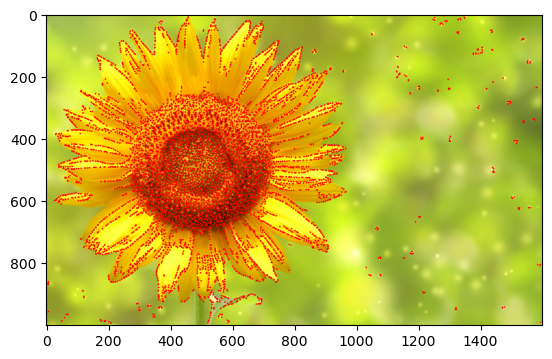

In [77]:
c_t1,corner_coordinate1 =Thresholding(c1)

ele_eigen = draw_corners(image, corner_coordinate1,t=2)
plt.imshow(ele_eigen)